In [16]:
from sktime.datasets import load_airline

y = load_airline()
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
y.index = y.index.to_timestamp()
y

Period
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: Number of airline passengers, Length: 144, dtype: float64

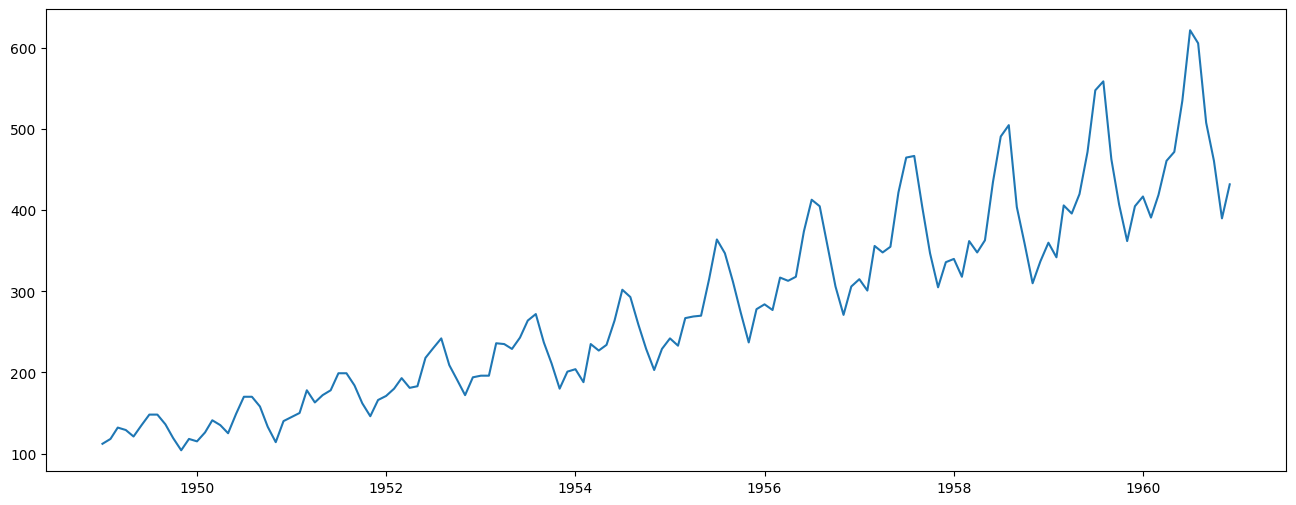

In [20]:
plt.figure(figsize=(16,6))
plt.plot(y)
plt.show()

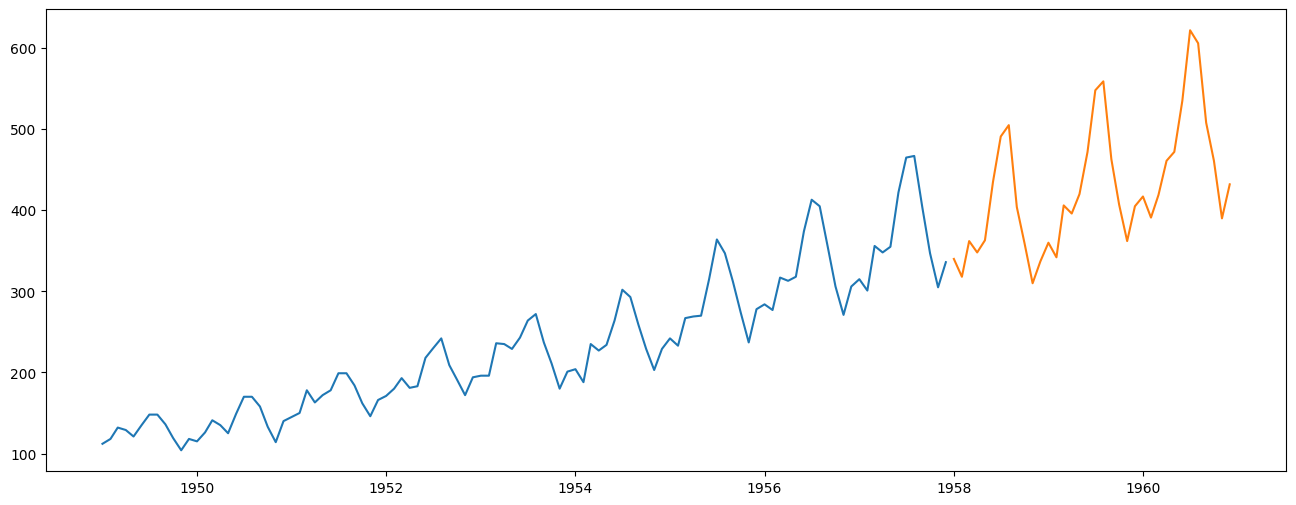

In [23]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y)
plt.figure(figsize=(16,6))
plt.plot(y_train)
plt.plot(y_test)
plt.show()

In [33]:
from sktime.forecasting.base import ForecastingHorizon # 데이터를 박싱해주는 역할
from sktime.forecasting.theta import ThetaForecaster # 시계열 예측을 위한 모델

y = load_airline()
y_train, y_test = temporal_train_test_split(y)

# false는 절대시간(해당날짜), true는 상대시간(train끝난 이후로부터)
y_fh = ForecastingHorizon(y_test.index, is_relative=False)
fc = ThetaForecaster(sp=12) # sp는 계절성 주기
fc.fit(y_train)
p_test = fc.predict(y_fh)
p_test

Period
1958-01    341.456422
1958-02    337.564661
1958-03    388.128055
1958-04    372.625120
1958-05    371.882597
1958-06    421.552202
1958-07    461.671562
1958-08    457.651131
1958-09    407.134111
1958-10    354.872813
1958-11    309.248681
1958-12    351.290690
1959-01    355.075758
1959-02    350.984167
1959-03    403.506705
1959-04    387.340913
1959-05    386.520892
1959-06    438.091373
1959-07    479.725747
1959-08    475.489959
1959-09    422.952449
1959-10    368.616151
1959-11    321.186583
1959-12    364.808052
1960-01    368.695095
1960-02    364.403672
1960-03    418.885355
1960-04    402.056706
1960-05    401.159186
1960-06    454.630544
1960-07    497.779932
1960-08    493.328786
1960-09    438.770787
1960-10    382.359489
1960-11    333.124485
1960-12    378.325414
Freq: M, Name: Number of airline passengers, dtype: float64

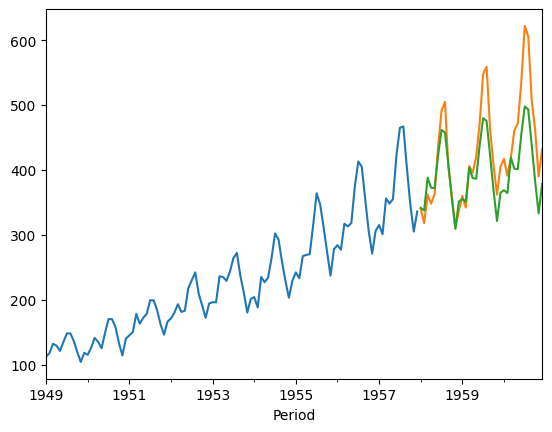

In [37]:
y_train.plot()
y_test.plot()
p_test.plot()
plt.show()
# 사이킷 메트릭스에 있는 걸로 평가 가능

In [39]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, p_test) # 8%의 오차

0.08174636612807698

# 시계열 분류

In [45]:
from sktime.datasets import load_arrow_head

X, y = load_arrow_head()
X

,dim_0
0,0 -1.963009 1 -1.957825 2 -1.95614...
1,0 -1.774571 1 -1.774036 2 -1.77658...
2,0 -1.866021 1 -1.841991 2 -1.83502...
3,0 -2.073758 1 -2.073301 2 -2.04460...
4,0 -1.746255 1 -1.741263 2 -1.72274...
...,...
206,0 -1.625142 1 -1.622988 2 -1.62606...
207,0 -1.657757 1 -1.664673 2 -1.63264...
208,0 -1.603279 1 -1.587365 2 -1.57740...
209,0 -1.739020 1 -1.741534 2 -1.73286...


In [46]:
y

array(['0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0',
       '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1',
       '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
# 회귀도 똑같이 사용 가능
from sktime.classification.interval_based import TimeSeriesForestClassifier

forest = TimeSeriesForestClassifier()
forest.fit(X_train, y_train)
p_test = forest.predict(X_test)
p_test

array(['2', '0', '2', '0', '0', '0', '0', '0', '0', '2', '2', '0', '0',
       '0', '0', '0', '2', '0', '2', '1', '0', '0', '0', '2', '0', '0',
       '1', '0', '2', '2', '1', '0', '0', '0', '1', '0', '0', '0', '2',
       '1', '2', '0', '2', '1', '0', '1', '0', '2', '2', '2', '2', '2',
       '0'], dtype='<U1')

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, p_test)

0.8301886792452831

# 시계열 클러스터링

In [59]:
# euclidean, Dynamic Time Warping(DTW) , KMeans는 드물게 predict을 사용함
from sktime.clustering.k_means import TimeSeriesKMeans

km = TimeSeriesKMeans(n_clusters=5, init_algorithm='forgy', metric='dtw')
km.fit(X_train) # 클러스터링은 y값이 필요없음

TimeSeriesKMeans(init_algorithm='forgy', n_clusters=5)

<Figure size 500x1000 with 0 Axes>

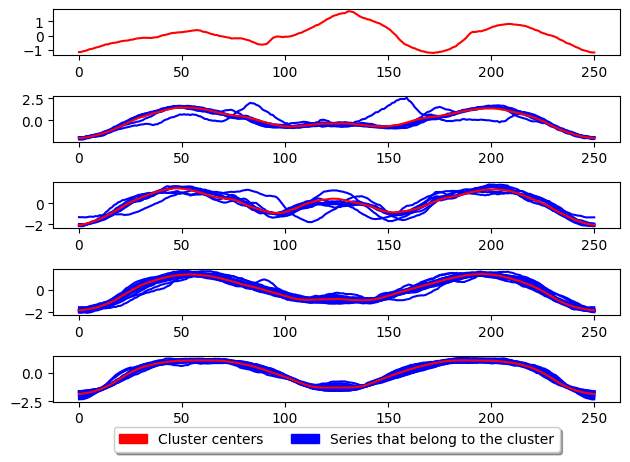

In [60]:
# 그래프로 확인
from sktime.clustering.utils.plotting._plot_partitions import plot_cluster_algorithm

plot_cluster_algorithm(km, X_test, km.n_clusters)

In [71]:
km = TimeSeriesKMeans(n_clusters=3, init_algorithm='forgy', metric='dtw')
km.fit(X_train) # 클러스터링은 y값이 필요없음

TimeSeriesKMeans(init_algorithm='forgy', n_clusters=3)

<Figure size 500x1000 with 0 Axes>

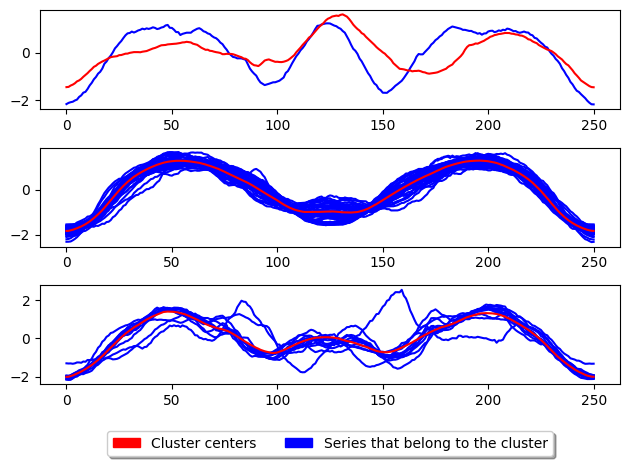

In [72]:
plot_cluster_algorithm(km, X_test, km.n_clusters)

# 시계열 데이터 전처리

In [75]:
# 데이터가 정돈이 안 되어 있는 경우
df = pd.DataFrame([[10.6,0], [7.3, 0],[7.0, 0], [11.2, 1], [18.4, 1]])
df

,0,1
0,10.6,0
1,7.3,0
2,7.0,0
3,11.2,1
4,18.4,1


In [77]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
X

array([10.6,  7.3,  7. , 11.2, 18.4])

In [84]:
# stride 는 2개씩 묶어서
# 데이터가 적을 때
stride = 2

X_t = []
for i in range(stride -1, len(X)):
    print(X[i - (stride-1):i+1], y[i])
    X_t.append(X[i - (stride-1):i+1])
# X_t 왜?
X_t = np.array(X_t)
X_t


[10.6  7.3] 0
[7.3 7. ] 0
[ 7.  11.2] 1
[11.2 18.4] 1


array([[10.6,  7.3],
       [ 7.3,  7. ],
       [ 7. , 11.2],
       [11.2, 18.4]])

In [86]:
y[stride-1:]

array([0, 0, 1, 1], dtype=int64)

In [88]:
# 슬라이딩 윈도우 기법
np.lib.stride_tricks.sliding_window_view(X, window_shape=stride)

array([[10.6,  7.3],
       [ 7.3,  7. ],
       [ 7. , 11.2],
       [11.2, 18.4]])

# 실습1

In [91]:
# output 1심장마비 위험도 높고, 0은 낮다
# trdbps 휴식시 혈압, chol 콜레스테롤, fbs 공복혈당, restecg 휴식시 심전도(1파형이상2좌심실비대), thalach 최대심박수
# exang 운동 유발 협심증, oldpeak (파형이상)휴식시 심장변화, slp 말하기증상(2심함), caa 주요혈관 수, thall 빈혈
heart = pd.read_csv('./src/heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [92]:
heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

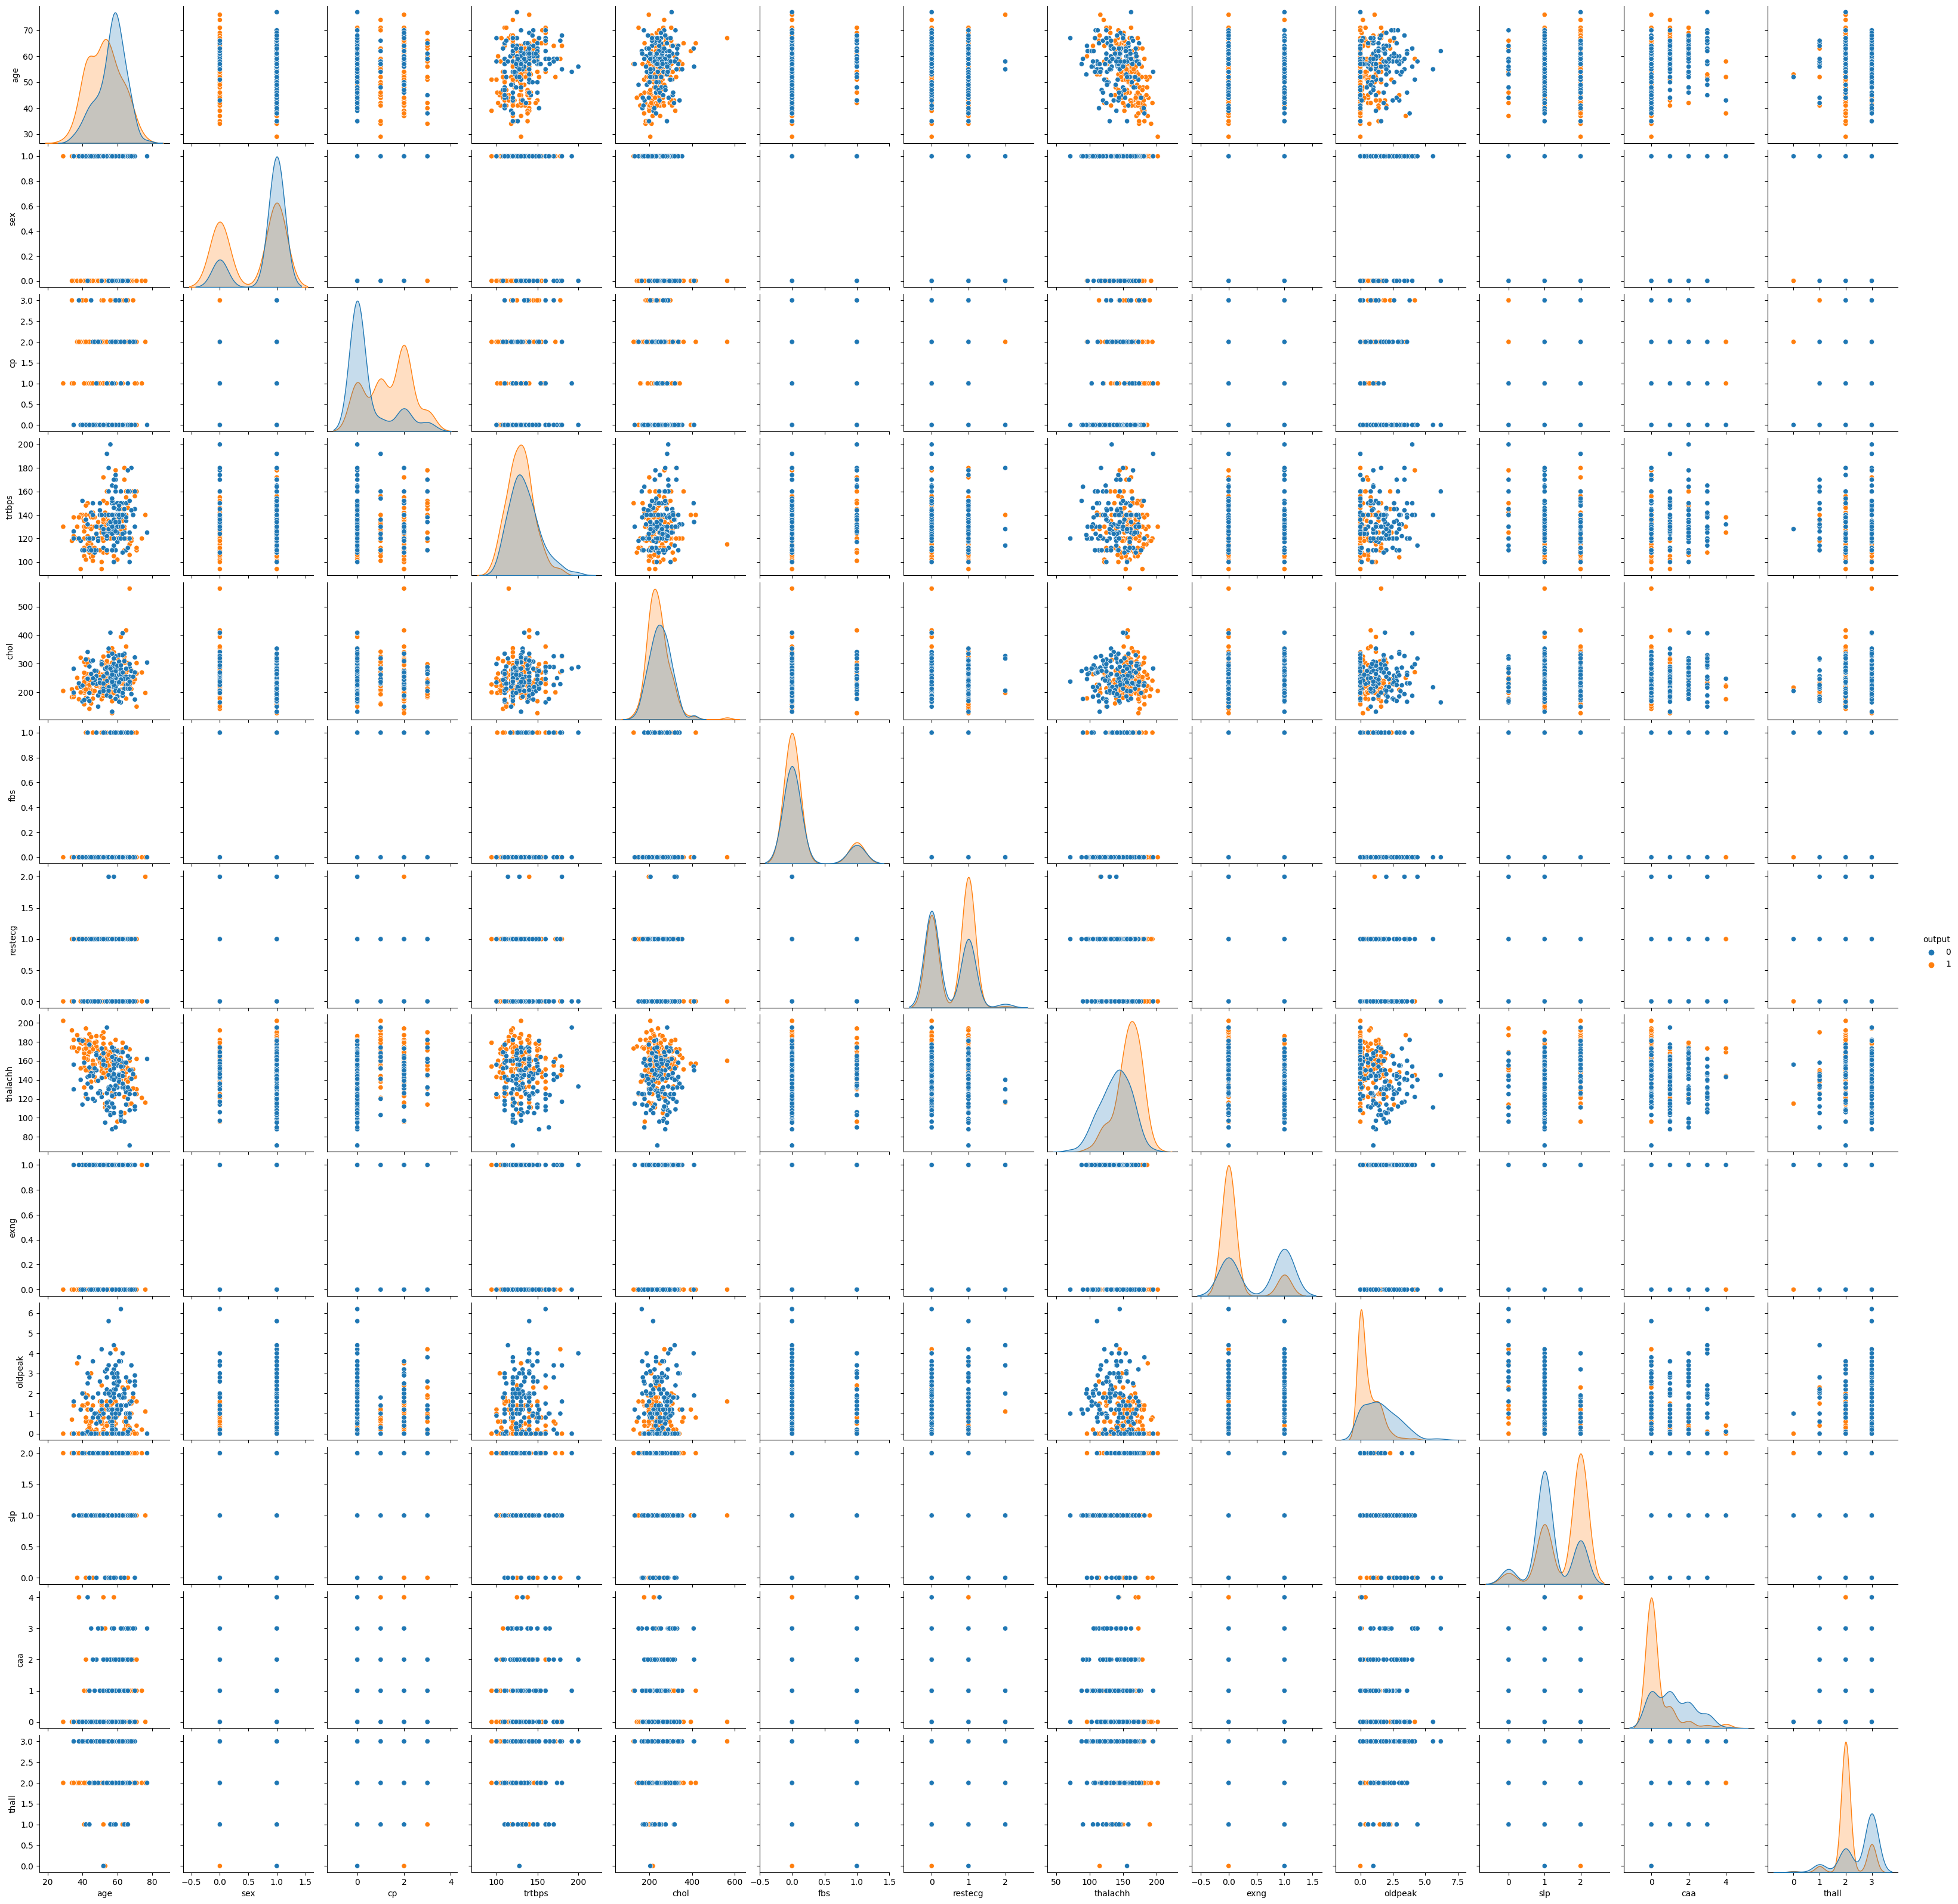

In [93]:
import seaborn as sns

sns.pairplot(heart, hue='output')
plt.show()

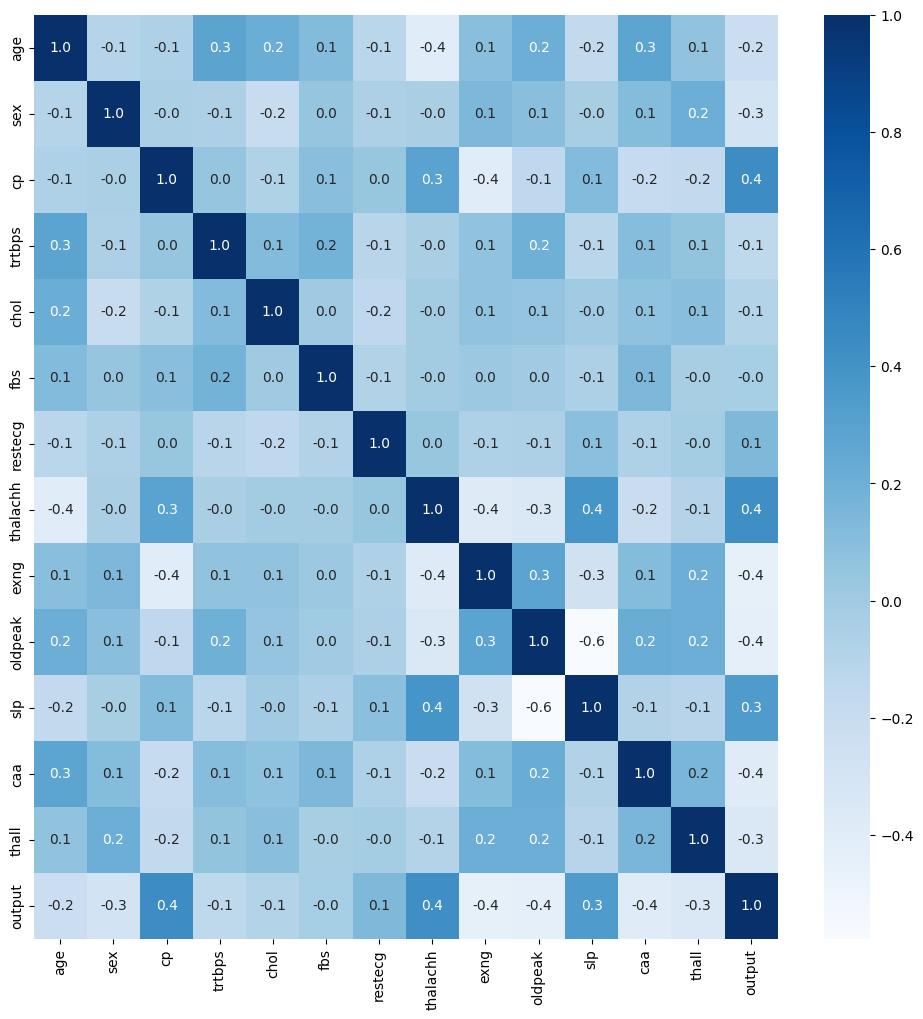

In [97]:
# 히트맵 그리기
plt.figure(figsize=(12, 12))
sns.heatmap(heart.corr(), annot=True, fmt='.1f', cmap='Blues')
plt.show()

In [102]:
heart.corr()['output'].abs().sort_values(ascending=False)

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

In [111]:
heart['exng'].value_counts()

0    204
1     99
Name: exng, dtype: int64

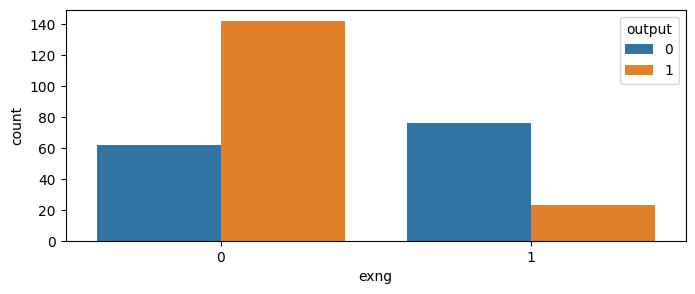

In [113]:
plt.figure(figsize=(8, 3))
sns.countplot(x='exng', hue='output', data=heart)
plt.show()